In [1]:
import re
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in data, all columns as string (object)
df = pd.read_csv('QC_summary_all.csv', index_col=0, dtype=str)
print(df.head())
print(df.shape)
print(df.dtypes)

     Estimated Number of Cells Mean Reads per Cell Median Genes per Cell  \
G1_1                    74,854               2,640                   565   
G1_3                    71,477               2,772                   572   
G2_1                    71,260               2,800                   522   
G2_2                    76,264               1,951                   375   
G3_1                    75,347               2,078                   405   

     Number of Reads Valid Barcodes Sequencing Saturation  \
G1_1     197,648,996          97.0%                 36.2%   
G1_3     198,147,283          97.2%                 42.3%   
G2_1     199,509,560          96.6%                 37.9%   
G2_2     148,812,747          96.5%                 32.7%   
G3_1     156,607,055          96.6%                 33.6%   

     Q30 Bases in Barcode Q30 Bases in RNA Read Q30 Bases in UMI  \
G1_1                94.9%                 82.1%            94.3%   
G1_3                95.0%               

In [3]:
# Removing '%' and ',' characters, then converting all columns to float values
df1 = df.copy()
for col in df1.columns:
    df1[col] = list(map(lambda x: float(re.sub(r'[%,]','',x)), df1[col]))
df1['study'] = ['Study1']*df1.shape[0]
print(df1.head())

      Estimated Number of Cells  Mean Reads per Cell  Median Genes per Cell  \
G1_1                    74854.0               2640.0                  565.0   
G1_3                    71477.0               2772.0                  572.0   
G2_1                    71260.0               2800.0                  522.0   
G2_2                    76264.0               1951.0                  375.0   
G3_1                    75347.0               2078.0                  405.0   

      Number of Reads  Valid Barcodes  Sequencing Saturation  \
G1_1      197648996.0            97.0                   36.2   
G1_3      198147283.0            97.2                   42.3   
G2_1      199509560.0            96.6                   37.9   
G2_2      148812747.0            96.5                   32.7   
G3_1      156607055.0            96.6                   33.6   

      Q30 Bases in Barcode  Q30 Bases in RNA Read  Q30 Bases in UMI  \
G1_1                  94.9                   82.1              94.3  

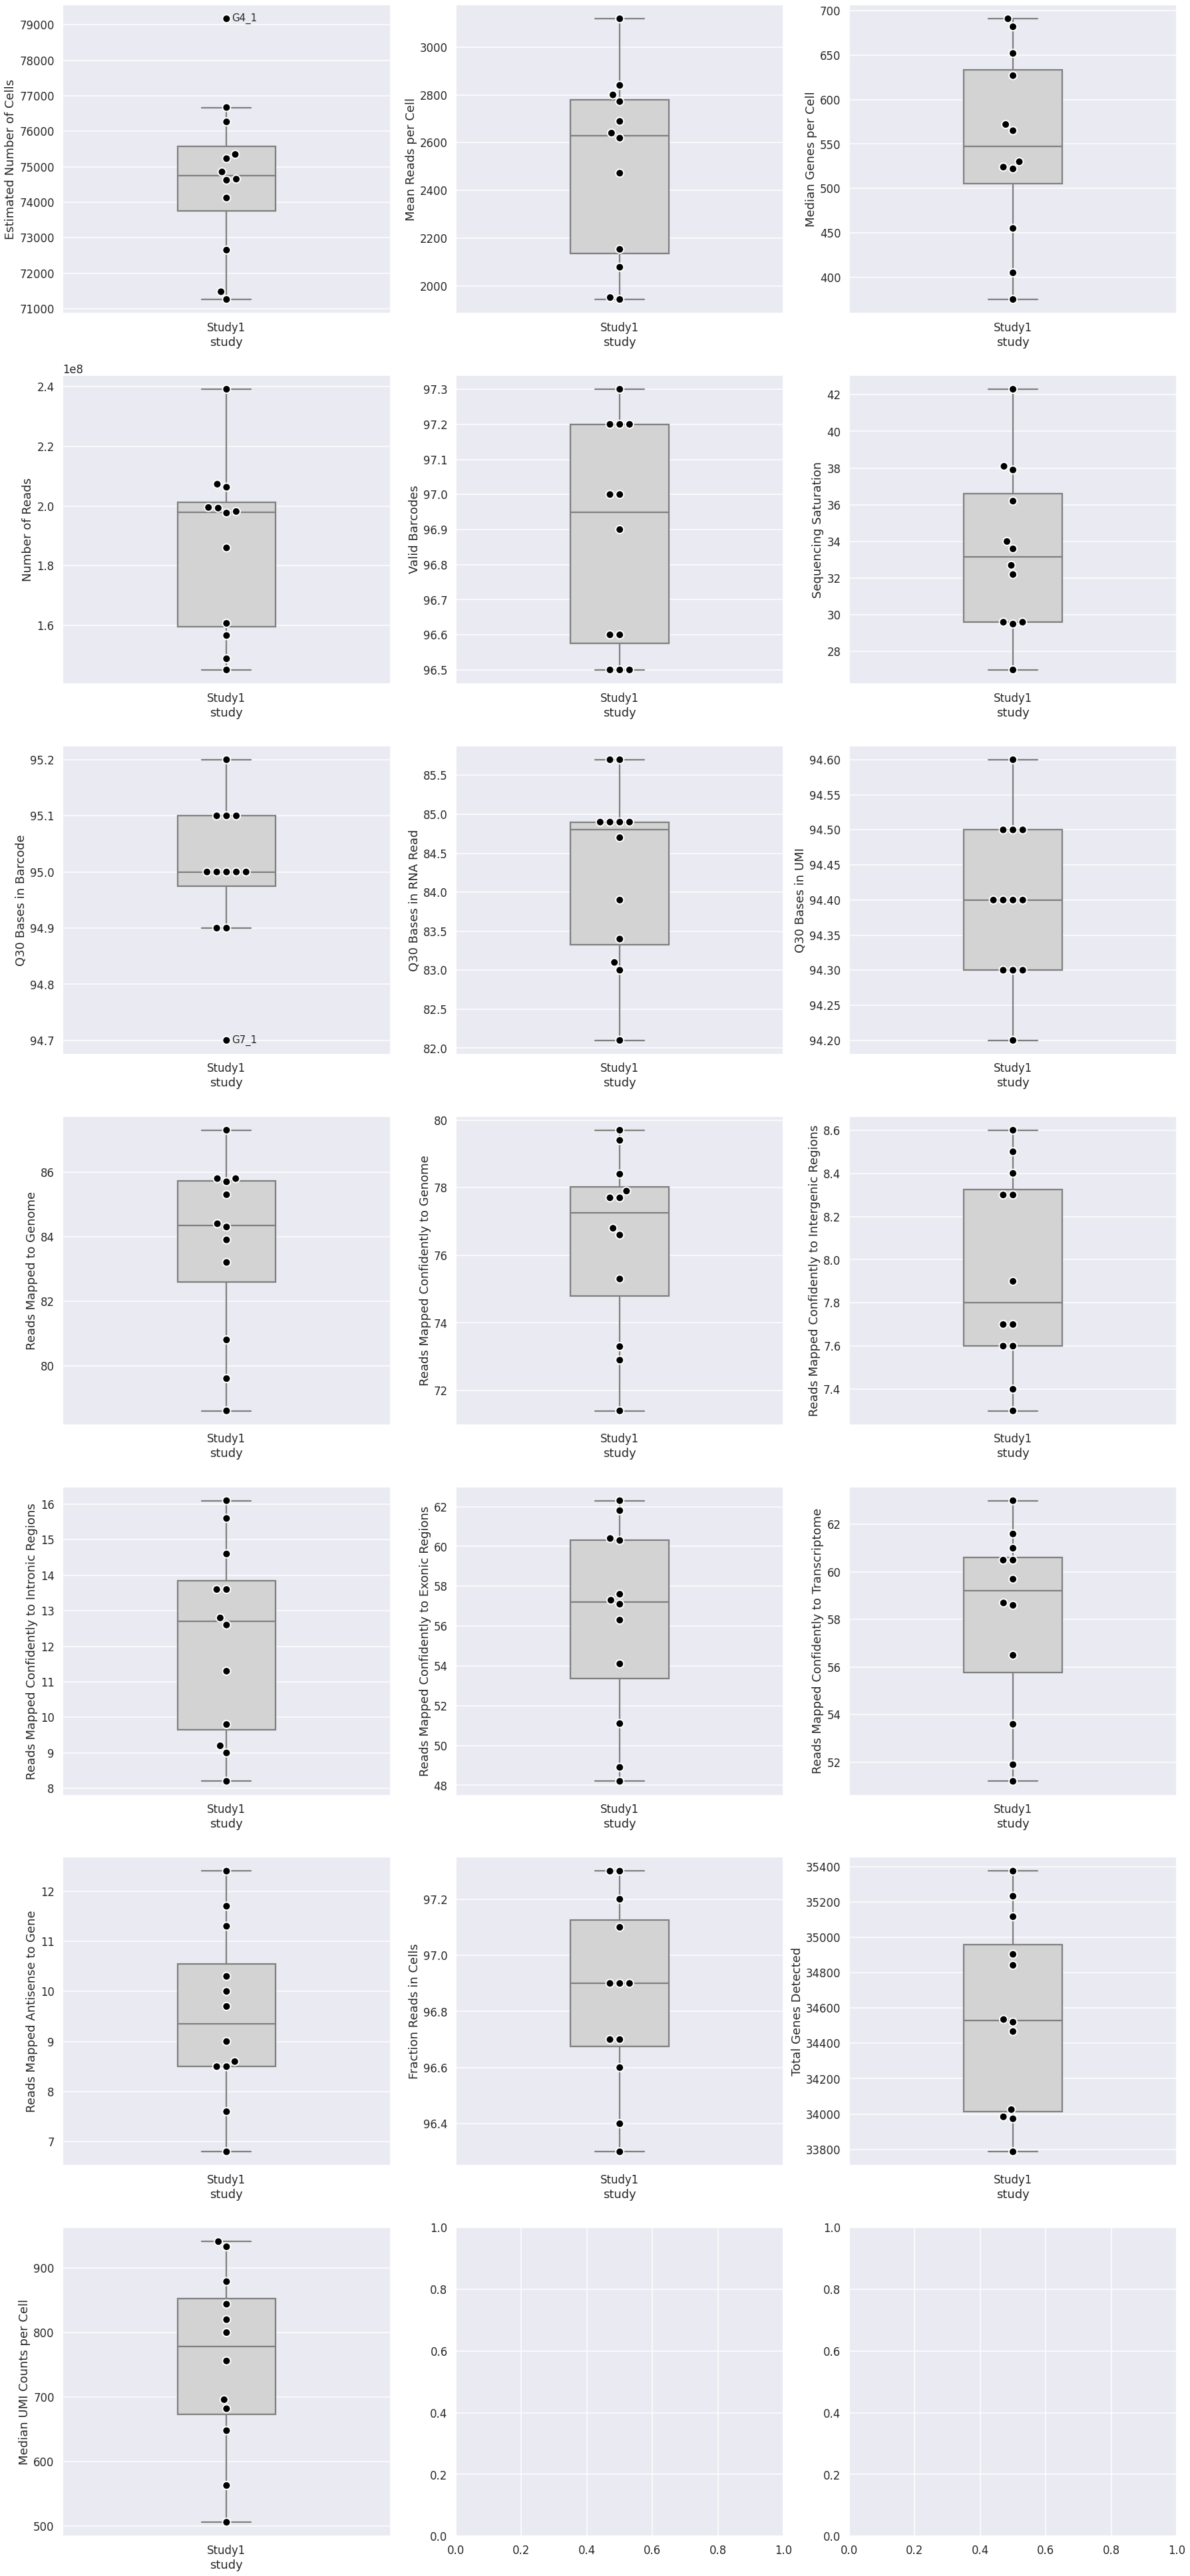

In [4]:
sns.set(context='talk')
fig,axes = plt.subplots(7,3,figsize=(30,70))
for n,col in enumerate(df1.columns[:-1]):
    i = int(n/3)
    j = n % 3
    q1 = df1[col].quantile(.25)
    q3 = df1[col].quantile(.75)
    upperlimit = q3 + 1.5 * (q3-q1)
    lowerlimit = q1 - 1.5 * (q3-q1)
    
    sns.boxplot(x='study',y=col,data=df1,color='lightgrey',fliersize=0,width=.3,ax=axes[i][j])
    sns.swarmplot(x='study',y=col,data=df1,color='black',s=12,edgecolor='white',linewidth=2,ax=axes[i][j])
    top = df1[(df1[col]<lowerlimit) | (df1[col]>upperlimit)].copy()
    #top = df1.copy()
    for label,x,y in zip(top.index,[0]*top.shape[0],top[col]):
            axes[i][j].annotate(label,xy=(x,y),xytext=(8,0),textcoords='offset points',ha='left',va='center',fontsize=15)

In [5]:
# Loading in Example QC from Optigon samples
df2 = pd.read_csv('/data/Study2/QC_summary_tbl.csv',index_col=0)
df3 = df2.copy().astype(str)
for col in df3.columns:
    df3[col] = list(map(lambda x: float(re.sub(r'[%,]','',x)), df3[col]))
df3['study'] = ['Study2']*df3.shape[0]
print(df3.head())

       Estimated Number of Cells  Mean Reads per Cell  Median Genes per Cell  \
CB47                      7448.0              28916.0                 1260.0   
CB119                     5709.0              36827.0                 1567.0   
CB38                      4699.0              46018.0                 1816.0   
CB111                     4843.0              35483.0                 1427.0   
CB87                      4926.0              49480.0                 1598.0   

       Number of Reads  Valid Barcodes  Sequencing Saturation  \
CB47       215368770.0            95.4                   43.7   
CB119      210246811.0            96.6                   50.0   
CB38       216239049.0            96.8                   57.7   
CB111      171843557.0            96.6                   47.8   
CB87       243736388.0            96.7                   59.0   

       Q30 Bases in Barcode  Q30 Bases in RNA Read  Q30 Bases in UMI  \
CB47                   96.6                   90.2      

In [6]:
# Loading in QC from oFSH study
df4 = pd.read_csv('/data/Study3/QC_summary_tbl.csv',index_col=0)
df5 = df4.copy().astype(str)
for col in df5.columns:
    df5[col] = list(map(lambda x: float(re.sub(r'[%,]','',x)), df5[col]))
df5['study'] = ['Study3']*df5.shape[0]
print(df5.head())

       Estimated Number of Cells  Mean Reads per Cell  Median Genes per Cell  \
Ov92                     70900.0               3164.0                  399.0   
Ov12                     72186.0               3488.0                  458.0   
Ov52                     72349.0               2560.0                  468.0   
Ov133                    67863.0               2392.0                  311.0   
Ov85                     56616.0               3499.0                  362.0   

       Number of Reads  Valid Barcodes  Sequencing Saturation  \
Ov92       224349827.0            96.1                   35.4   
Ov12       251789246.0            96.7                   56.0   
Ov52       185228402.0            96.8                   41.2   
Ov133      162307886.0            95.3                   37.0   
Ov85       198122553.0            95.9                   45.6   

       Q30 Bases in Barcode  Q30 Bases in RNA Read  Q30 Bases in UMI  \
Ov92                   95.0                   85.8      

/opt/python/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


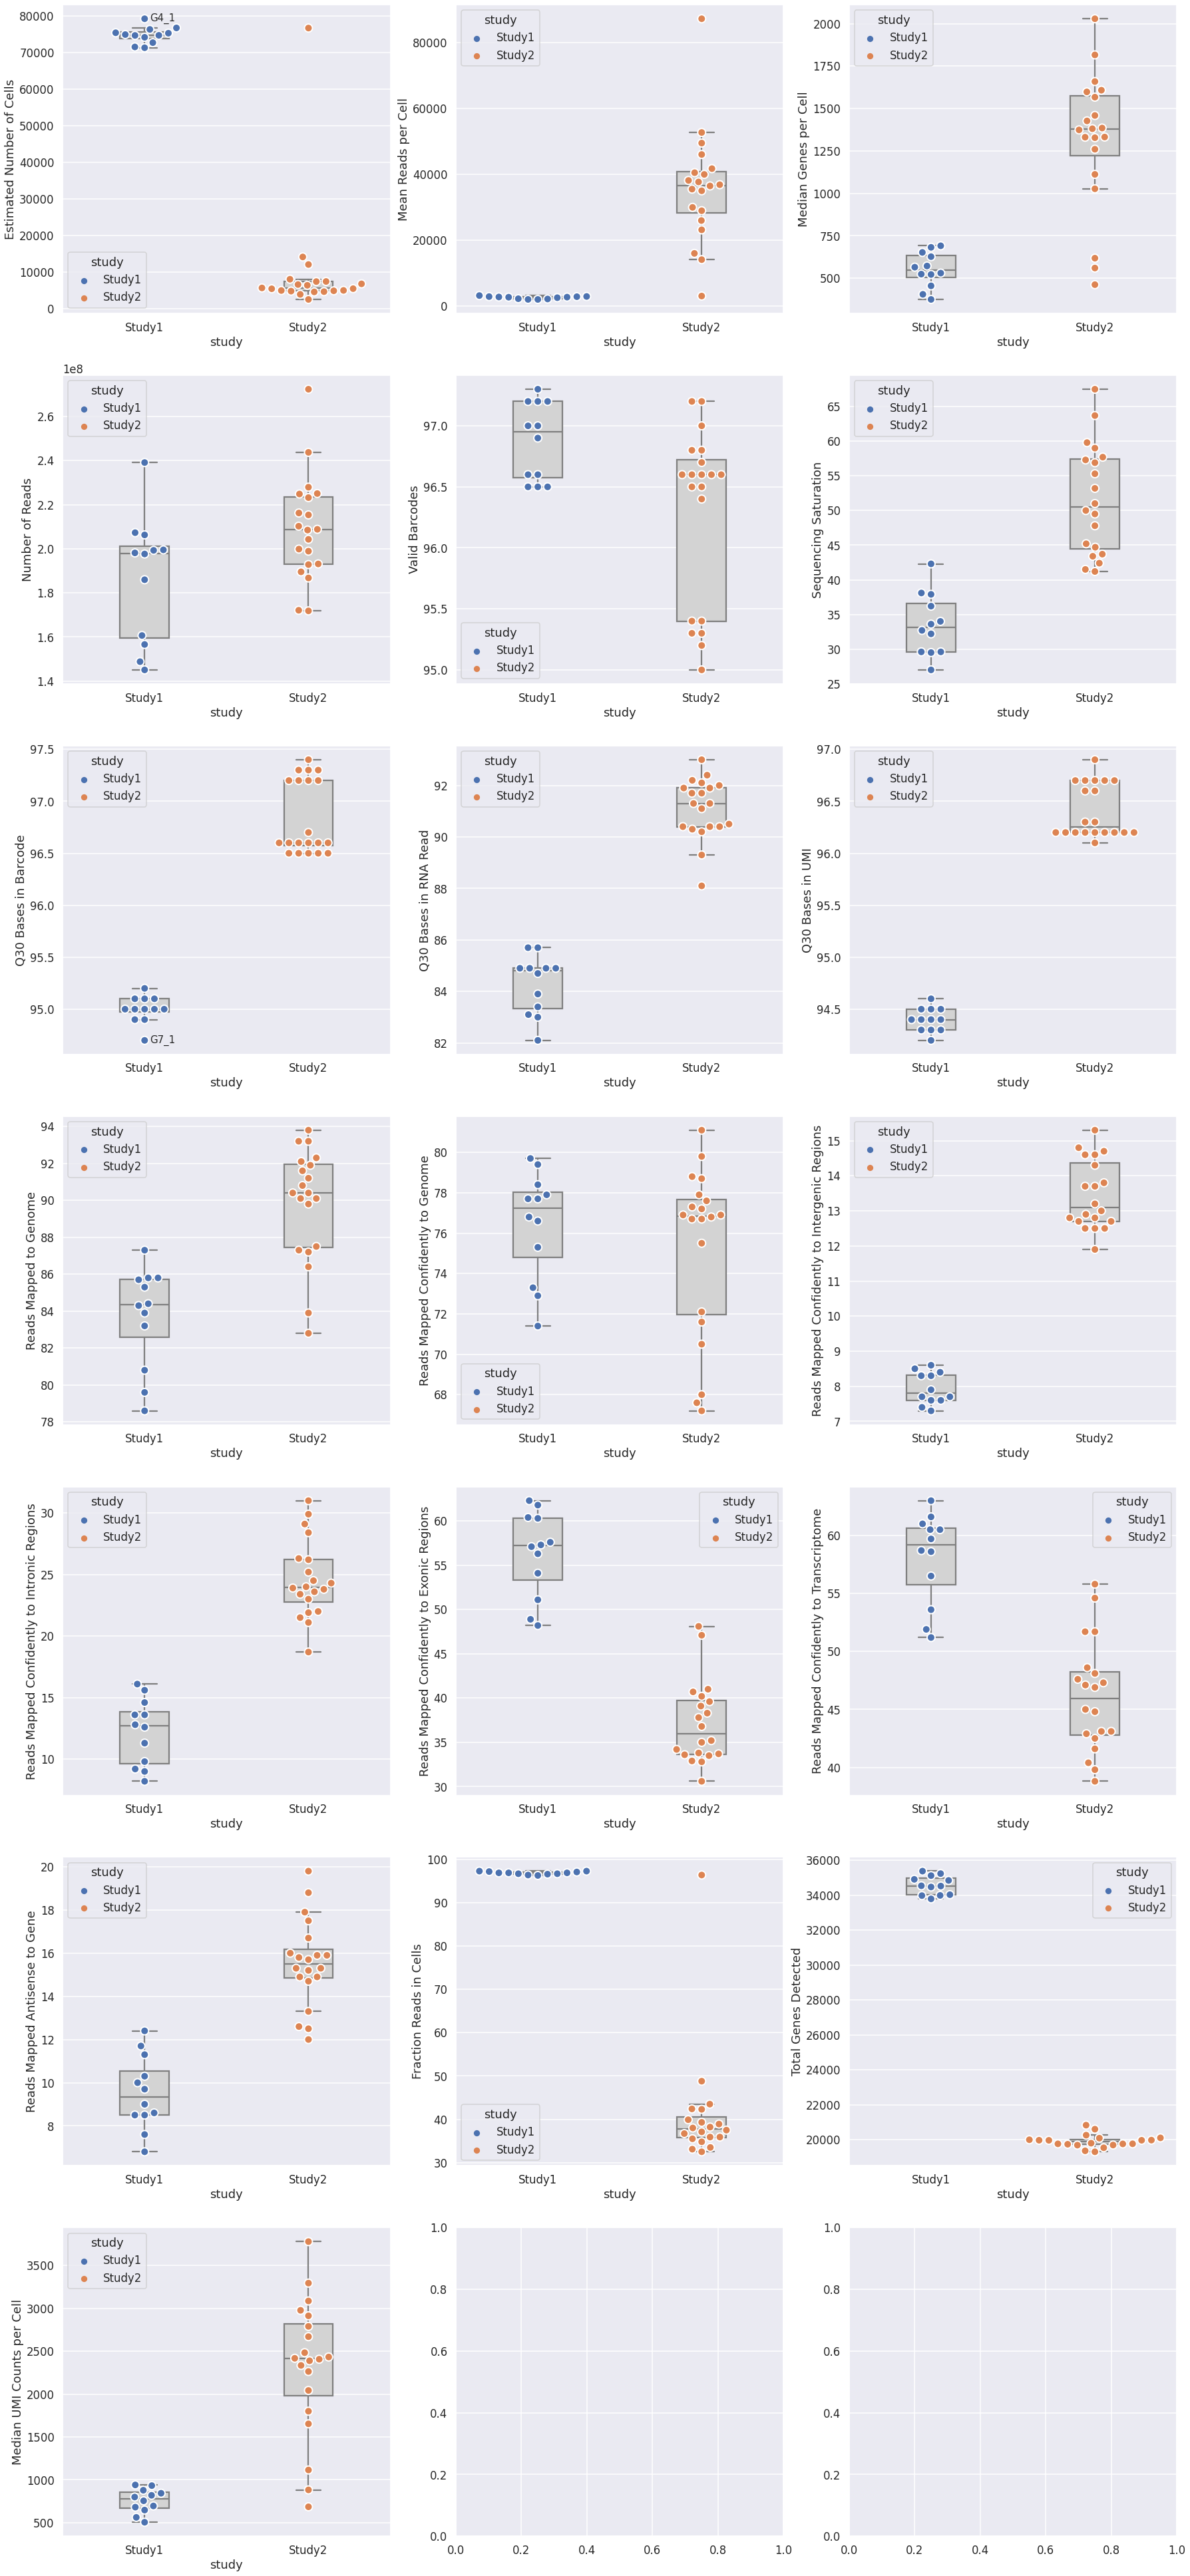

In [7]:
comb = pd.concat([df1,df3],join='inner',axis=0)
sns.set(context='talk')
fig,axes = plt.subplots(7,3,figsize=(30,70))
for n,col in enumerate(comb.columns[:-1]):
    i = int(n/3)
    j = n % 3
    q1 = df1[col].quantile(.25)
    q3 = df1[col].quantile(.75)
    upperlimit = q3 + 1.5 * (q3-q1)
    lowerlimit = q1 - 1.5 * (q3-q1)
    
    sns.boxplot(x='study',y=col,data=comb,color='lightgrey',fliersize=0,width=.3,ax=axes[i][j])
    sns.swarmplot(x='study',y=col,data=comb,hue='study',s=12,edgecolor='white',linewidth=2,ax=axes[i][j])
    top = df1[(df1[col]<lowerlimit) | (df1[col]>upperlimit)].copy()
    for label,x,y in zip(top.index,[0]*top.shape[0],top[col]):
            axes[i][j].annotate(label,xy=(x,y),xytext=(8,0),textcoords='offset points',ha='left',va='center',fontsize=15)

/opt/python/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/python/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


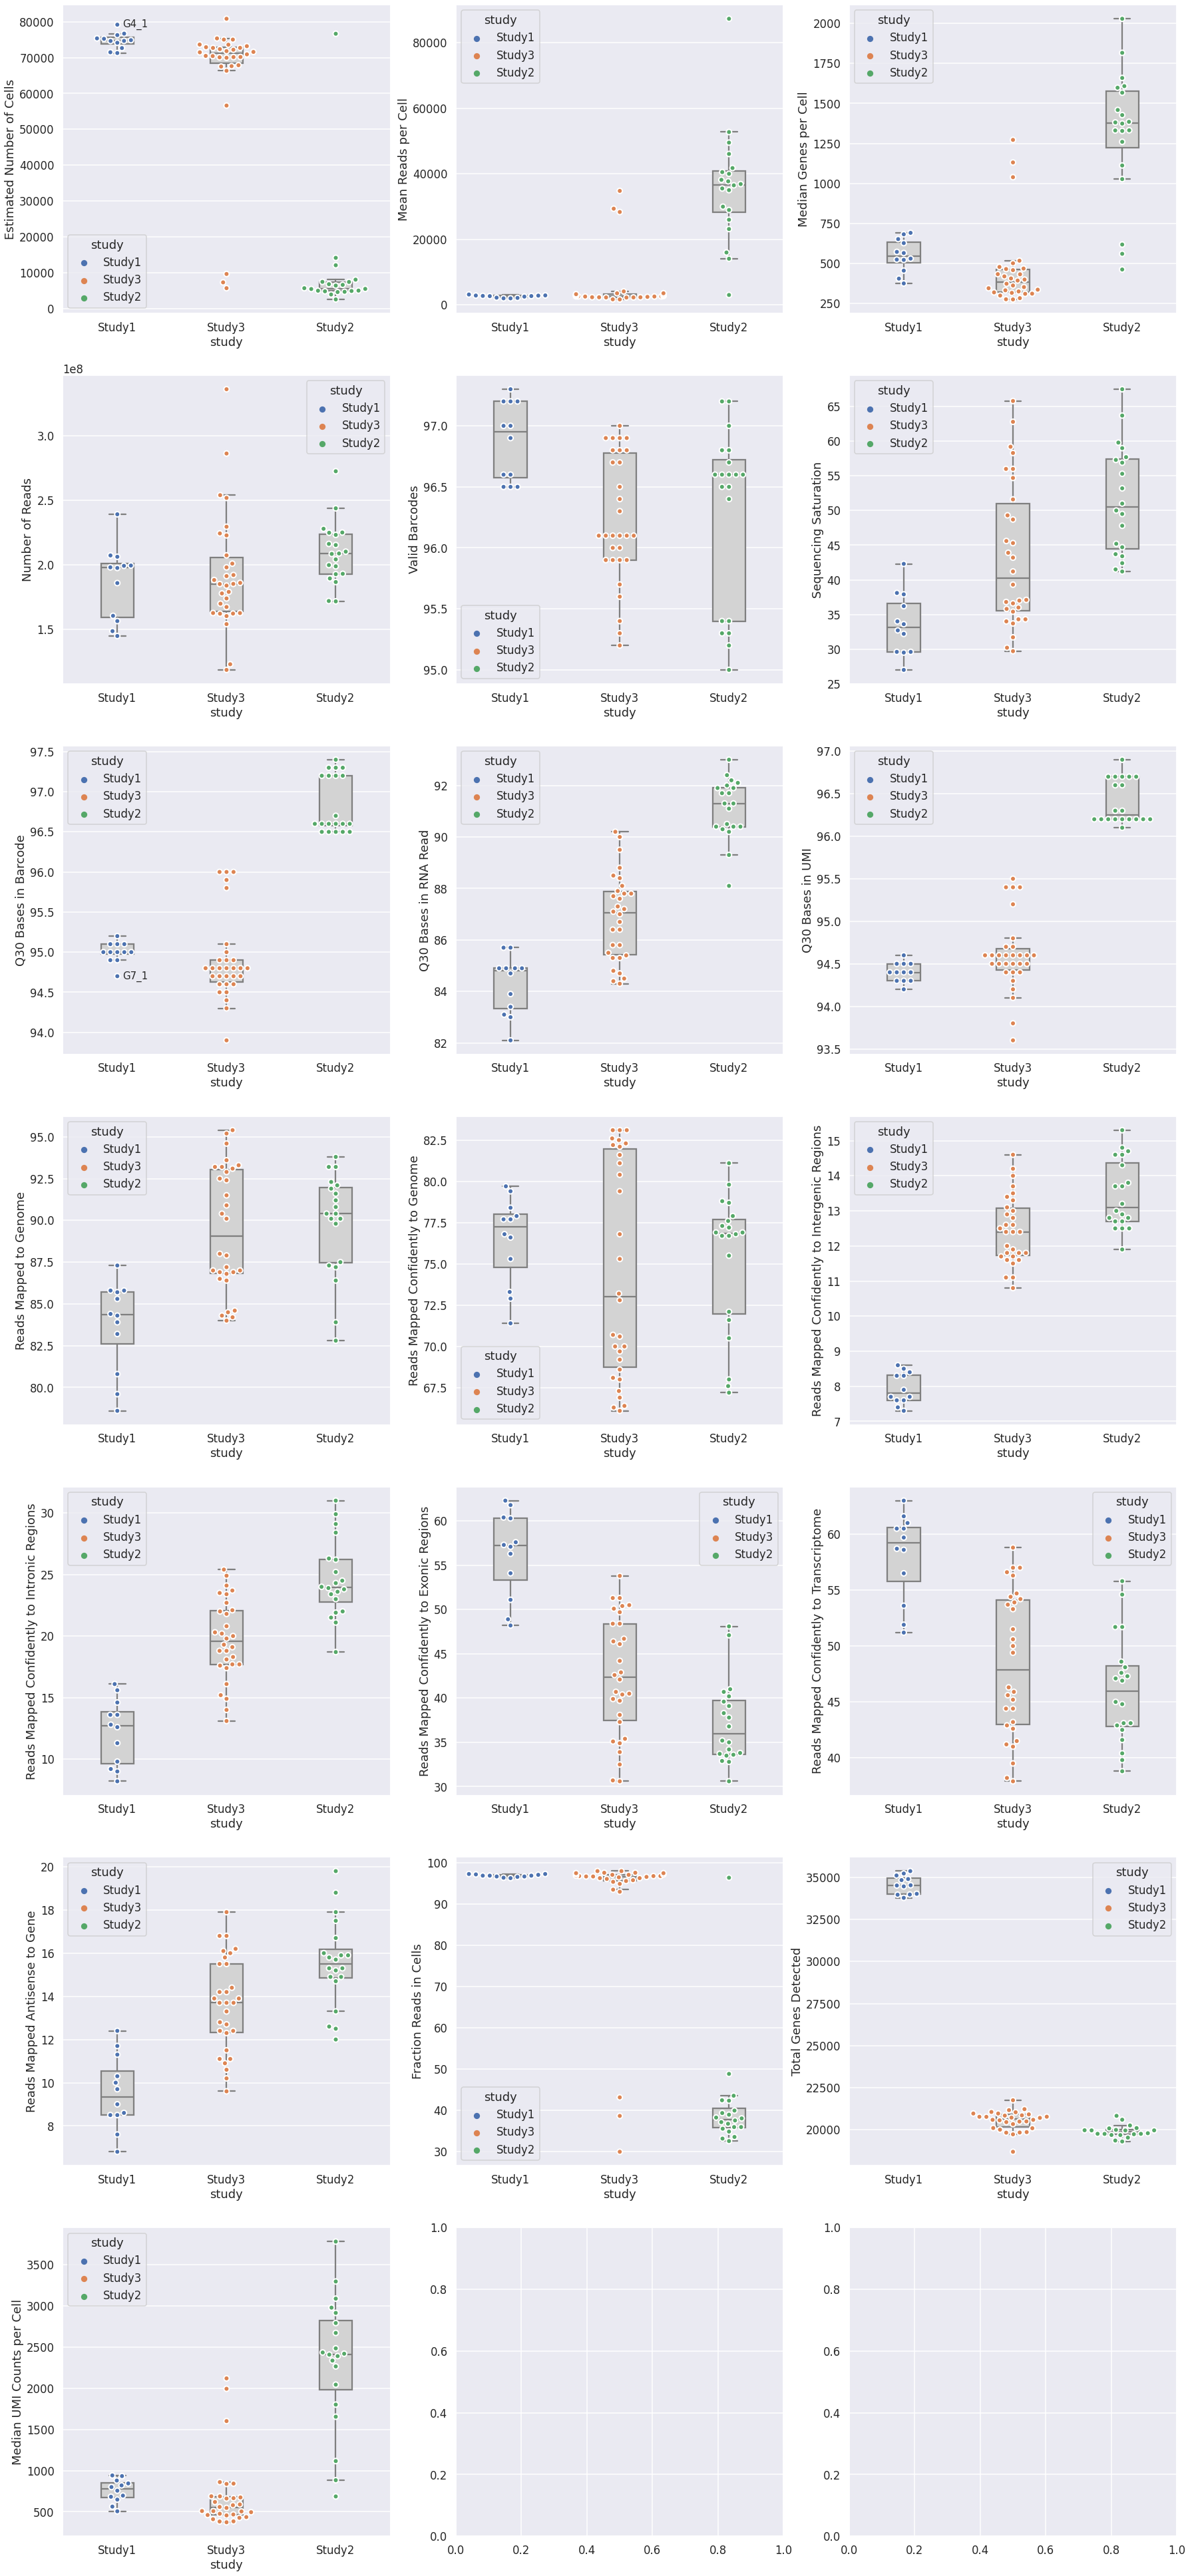

In [8]:
comb = pd.concat([df1,df5,df3],join='inner',axis=0)
sns.set(context='talk')
fig,axes = plt.subplots(7,3,figsize=(30,70))
for n,col in enumerate(comb.columns[:-1]):
    i = int(n/3)
    j = n % 3
    q1 = df1[col].quantile(.25)
    q3 = df1[col].quantile(.75)
    upperlimit = q3 + 1.5 * (q3-q1)
    lowerlimit = q1 - 1.5 * (q3-q1)
    
    sns.boxplot(x='study',y=col,data=comb,color='lightgrey',fliersize=0,width=.3,ax=axes[i][j])
    sns.swarmplot(x='study',y=col,data=comb,hue='study',s=8,edgecolor='white',linewidth=2,ax=axes[i][j])
    top = df1[(df1[col]<lowerlimit) | (df1[col]>upperlimit)].copy()
    for label,x,y in zip(top.index,[0]*top.shape[0],top[col]):
            axes[i][j].annotate(label,xy=(x,y),xytext=(8,0),textcoords='offset points',ha='left',va='center',fontsize=15)